In [31]:
from pybrain.structure import FeedForwardNetwork
print("PyBrain installed successfully!")

PyBrain installed successfully!


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pybrain.datasets import SupervisedDataSet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from pybrain.tools.shortcuts import buildNetwork, FeedForwardNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import TanhLayer, LinearLayer
import statsmodels.api as sm
from pybrain.structure import FullConnection

import pickle

In [33]:
data = pd.read_csv('dataset03.csv')
data.head()

,x,y
0,10.611377,-0.258198
1,4.386448,0.007454
2,40.939164,48.647258
3,47.514869,47.497798
4,2.402540,1.414437


In [34]:
X = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

In [50]:
X

array([[10.61137699],
       [ 4.38644795],
       [40.93916393],
       ...,
       [16.31996325],
       [21.15707083],
       [23.41100065]])

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [38]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)
print(f"OLS Model - MSE: {mean_squared_error(y_test, y_pred_ols)}, R2: {r2_score(y_test, y_pred_ols)}")

OLS Model - MSE: 0.09337195554507705, R2: 0.9058237564890981


In [39]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
train_ds = SupervisedDataSet(input_size, output_size)

In [40]:
for i in range(len(X_train)):
    train_ds.addSample(X_train[i], y_train[i])

# for i in range(len(X_train)):
#     test_ds.addSample(X_train[i], y_train[i])

In [41]:
ann = FeedForwardNetwork()

In [42]:
input_layer = LinearLayer(X_train.shape[1])
hidden_layer = TanhLayer(5)
output_layer = LinearLayer(1)

In [43]:
ann.addInputModule(input_layer)
ann.addModule(hidden_layer)
ann.addOutputModule(output_layer)

In [44]:
ann.addConnection(FullConnection(input_layer,hidden_layer))
ann.addConnection(FullConnection(hidden_layer,output_layer))
ann.sortModules()

In [45]:
trainer = BackpropTrainer(ann, train_ds, learningrate=0.01, momentum=0.9)
trainer.trainUntilConvergence(maxEpochs=100)


([0.05174782531742564,
  0.04707951272741014,
  0.04730896470393143,
  0.04699325149087537,
  0.046806960950004764,
  0.04755721504414526,
  0.04730265152086691,
  0.047460547844744856,
  0.047071616576643036,
  0.04697796829714945,
  0.04721089737699934,
  0.047445720112230264,
  0.0468349665804892,
  0.04757106069743618,
  0.04732818137525905,
  0.04706885609474316],
 [3.5670789257770052,
  0.045683808890961936,
  0.04790073299257792,
  0.05596649824695196,
  0.09861482081199713,
  0.04949150079984976,
  0.04267570914583618,
  0.05193930743598002,
  0.04501915035876599,
  0.0427146772586128,
  0.0463720226658543,
  0.04894308802884352,
  0.04982630103630093,
  0.04347933991207593,
  0.04730638159105728,
  0.04556519184447133,
  0.04663291512892944])

In [46]:
ann_model_path = 'UE_05_App3_ANN_Model.pkl'
with open(ann_model_path, 'wb') as f:
    pickle.dump(ann, f)

In [47]:
with open(ann_model_path, 'rb') as f:
    loaded_network = pickle.load(f)

In [48]:
y_test_ann = [loaded_network.activate(sample) for sample in X_test] # ANN predictions

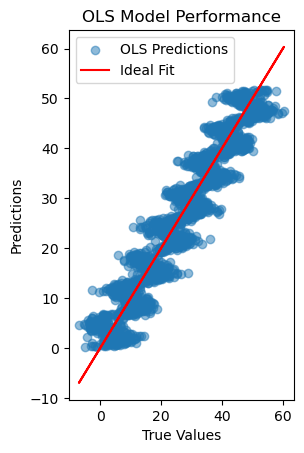

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_ols, alpha=0.5, label="OLS Predictions")
plt.plot(y_test, y_test, color="red", label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('OLS.pdf')
plt.title("OLS Model Performance")
plt.legend()
plt.show()
plt.close()


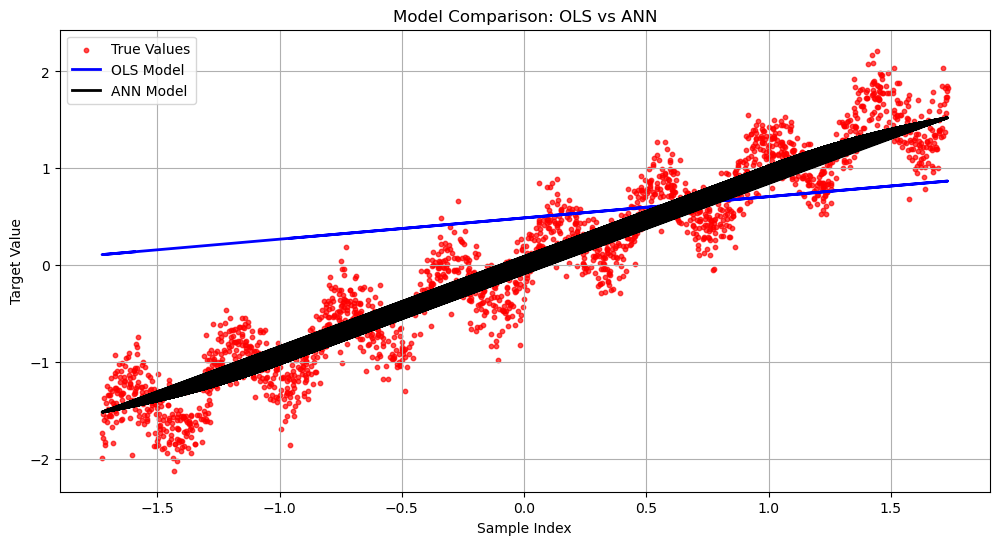

In [49]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='red', label='True Values', alpha=0.7, s=10)  # True data points
plt.plot(X_test, y_test_ols, color='blue', label='OLS Model', linewidth=2)  # OLS predictions
plt.plot(X_test, y_test_ann, color='black', label='ANN Model', linewidth=2)  # ANN predictions

plt.title("Model Comparison: OLS vs ANN")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()